# 2023年度 実世界情報実験１　画像処理テーマ

## 補足

高度な画像処理を行う場合、画像の解像度が高いと実行に非常に
時間やメモリを要する場合がある。
また、提出時のファイルサイズが非常に大きくなることもある。

特に自分で撮影した画像を用いる場合、必要に応じて縮小した画像を
用いて実験を行うとよい。
OpenCVの `cv2.resize()` 関数を用いると簡単に縮小することができる。
[OpenCV-Pythonチュートリアル » OpenCVを使った画像処理 »
画像の幾何変換 » スケーリング(拡大・縮小)](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#id4)
の項を参考にすればよい。

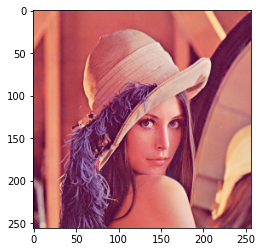

In [ ]:
# 画像の縮小の例
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')
height, width = img.shape[:2]
reduced_img = cv2.resize(img,(width//2, height//2), interpolation = cv2.INTER_CUBIC)
cv2.imwrite('reduced_lena.png', reduced_img)
plt.imshow(cv2.cvtColor(reduced_img,cv2.COLOR_BGR2RGB))

## 課題 6
これまでに学んできたOpenCVの機能を用いて何らかの
画像処理サービスを関数として実装し、ドキュメントと使用例を作成せよ。
また、作成にあたって工夫した点やアイディアや有用性についても指定の
解答欄で述べよ。

例えば以下のような例が考えられる
（これ以外のオリジナルアイディアが望ましいが
下記のものに一工夫加えたものも可）。
- 画像を与えると、そこに写っている人の顔をぼかして
プライバシー保護処理を行い、その結果を画像として返す関数
- 与えられた入力画像から人の顔を検出し、検出した顔を同じサイズとなるよう
拡大縮小したうえで（アルバムのように）並べた画像を作成する関数

関数のドキュメント作成の際には **関数名、引数の名前、引数の順序や各引数の意味、返り値の意味など** を明記すること。
引数に（例えば「人が写っている画像」のように）制限・条件がある場合はそれを
明記すること。

ドキュメントは、その
**関数を初めて使う人がドキュメントを見るだけで使い方を把握できること** が求められるのでそれを意識して作成すること。

OpenCVやNumPyのリファレンスマニュアルが参考になる。
- http://opencv.jp/opencv-2.1/cpp/object_detection.html#cv-cascadeclassifier-detectmultiscale
（内容はOpenCV 2.2用のもので古いことに注意）
- https://docs.opencv.org/4.1.2/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498
- https://numpy.org/doc/1.18/reference/generated/numpy.absolute.html


## 課題6 解答欄

### 課題6 解答欄 ドキュメント

この関数は与えられた画像から顔を検出し、お面をつける処理をする。
関数の第一引数は人の顔の写った画像を読み込んだもので第二引数はお面の画像を読み込んだものを入力する。
第一引数の人の写った画像の検出されたすべての顔にお面を合成した結果画像を返す。



### 課題6 解答欄 関数定義

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def face_composite(input_image, ome_image):
    # 顔検出のためのカスケード分類器を初期化する
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # 画像をグレースケールに変換する
    gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # 入力画像内の顔を検出する
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # 各検出された顔に対して処理を行う
    result_image = input_image.copy()
    for (x, y, w, h) in faces:
        # 顔領域のサイズにお面画像をリサイズする
            omen_resized = cv2.resize(omen_image, (w, h))

        # お面画像を検出された領域に合成する
        result_image[y:y+h, x:x+w] = omen_resized

    return result_image


### 課題6 解答欄 使用例
実際に実行できるコードで使用例を示すこと。
この例で使用するファイル（画像ファイル、データベースなど）が
あればそれも併せて提出すること。

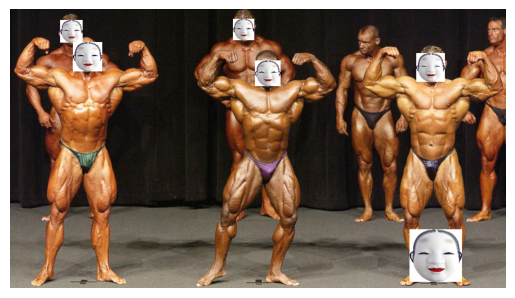

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# 入力画像の読み込み
input_image = cv2.imread('k.jpg')
#お面画像の読み込み
omen_image = cv2.imread('omen.jpg')

# 合成処理
result_image = face_composite(input_image, omen_image)

# 合成結果の画像を表示
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 課題 6 解答欄 工夫した点
お面画像のサイズを人の顔のサイズにresizeするように工夫した。

### 課題 6 解答欄 売りとなる点
人の顔にお面をかぶせることで顔が見えなくなりプライバシー保護が可能。


### 課題 6 解答欄 応用のアイディアなど
お面の画像ではなく人の顔の画像を入力に入れることで顔だけを合成処理できる。
